In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [48]:
def display_points3d(X,view=(50,50),  title="Estimated 3D points"):
    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot points
    ax.scatter3D(X[:, 0], X[:, 1], -X[:, 2], c='g')
    ax.view_init(view[0],view[1])

    # Set labels and legend
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title(title)

    # Show the plot
    plt.show()

In [49]:
data = np.loadtxt('data/measurement_matrix.txt')
# print(data.shape) #(202, 215)

data_mean = np.mean(data, axis=1).reshape((data.shape[0],1))
data_normalized = data - data_mean

u,s,vh = np.linalg.svd(data_normalized)
U = u[:,:3]
W = np.diag(s[:3])
V = vh[:3]
D = U @ W @ V
# print(D.shape)

M = U @ np.sqrt(W)
S = np.sqrt(W) @ V

A = np.matrix(M)
ID = np.identity(A.shape[0])
L = A.I * ID * (A.T).I
Q = np.linalg.cholesky(L)
M = M @ Q
S = Q.I @ S
print("Q: ",Q)

Q:  [[ 7.94778741e-03  0.00000000e+00  0.00000000e+00]
 [-7.14716488e-18  8.53955215e-03  0.00000000e+00]
 [ 8.52597488e-19  1.42832718e-17  2.53757864e-02]]


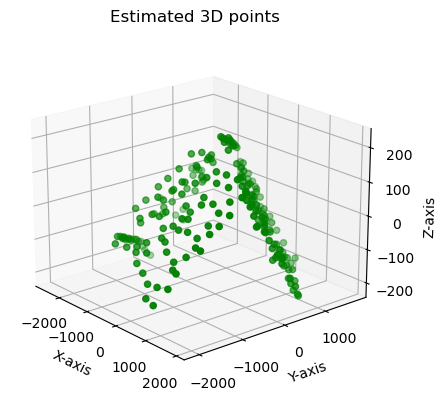

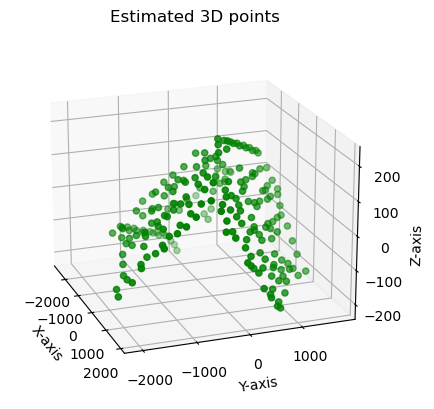

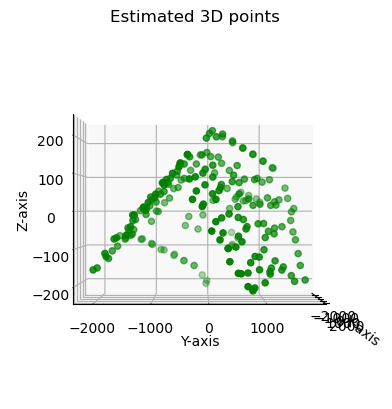

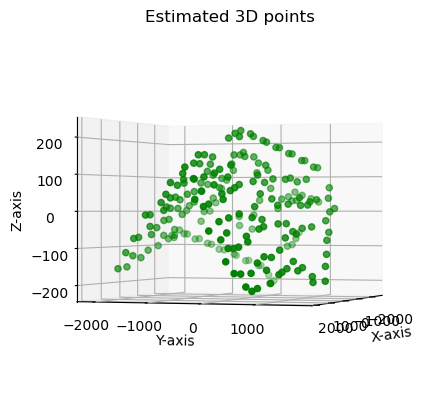

In [56]:
points = S.T

display_points3d(points, (20,-40))
display_points3d(points, (20,-20))
display_points3d(points, (0, 0))
display_points3d(points, (0, 20))


In [51]:
def display_overlay(frame, observed, estimated, image_path):
    observed = observed[2*(frame-1) : 2*frame]
    estimated = estimated[2*(frame-1) : 2*frame]
    # Display three frames with both observed and estimated points
    fig = plt.figure()

    # Plot observed feature points on the first frame
    ax = fig.add_subplot(111)
    img = cv2.imread(image_path)
    ax.imshow(img)  # Replace this with your actual image
    ax.scatter(observed[0], observed[1], c='r', marker='+',label='Observed Points')
    ax.scatter(estimated[0], estimated[1], c='g', marker='+', label='Estimated Points')
    ax.set_title('Frame {}'.format(frame))
    ax.legend()

    plt.show()

def residuals(frames, observed, estimated):
    residuals = []
    for i in range(1, frames+1):
        ob = observed[2*(i-1) : 2*i]
        es = estimated[2*(i-1) : 2*i]
        # Sum of squared Euclidean distances 
        res = np.sum((ob - es)**2)
        residuals.append(res)
    return residuals

def display_residual(residuals):
    n = len(residuals)
    x = np.arange(1, n+1,1)
    plt.title("Residual per frame (squared Euclidean distances))")
    plt.plot(x,residuals)
    plt.xlabel('frame')
    plt.ylabel('residual')
    plt.show()


(202, 215)


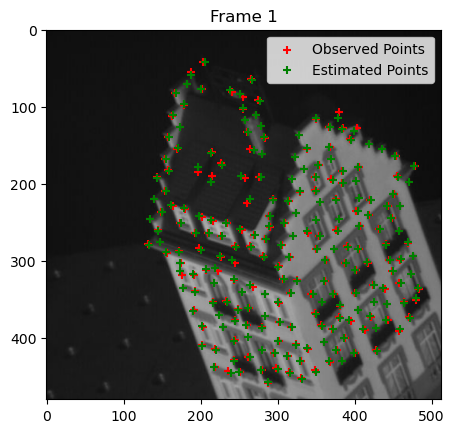

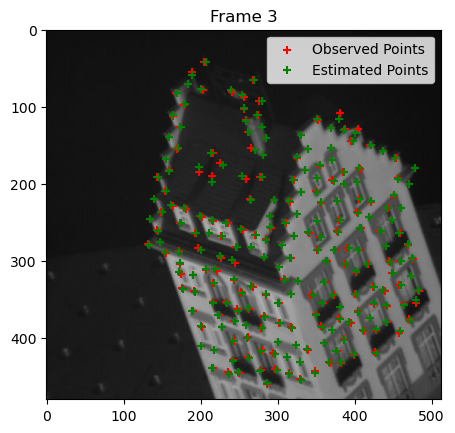

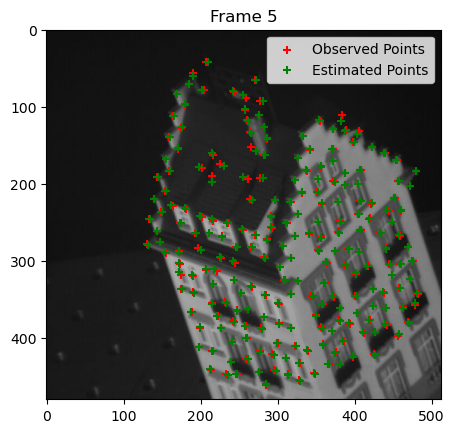

Total residual: 28583.41464098431


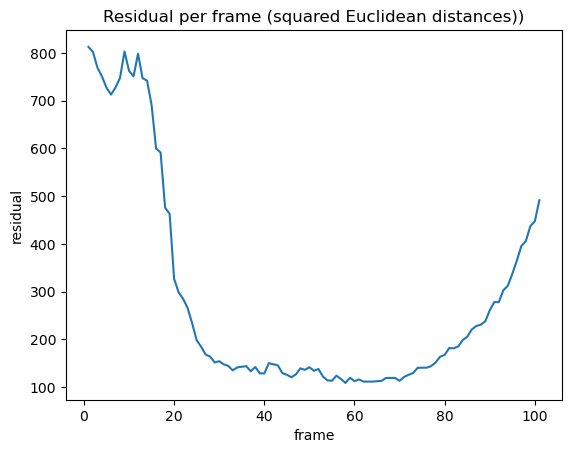

In [52]:
observed = data
estimated = np.array(D) + data_mean
print(estimated.shape)
display_overlay(1, observed, estimated, 'data/frame00000001.jpg')
display_overlay(3, observed, estimated, 'data/frame00000003.jpg')
display_overlay(5, observed, estimated, 'data/frame00000005.jpg')

res = residuals(data.shape[0]//2, observed, estimated)
print("Total residual:", np.sum(res))
display_residual(res)